# Import stuffs

In [171]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Get data in

In [172]:
housing = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv")
print(housing.head(), "\n")
print(housing.info(), "\n")
print(housing["ocean_proximity"].value_counts())
housing = housing.sample(frac=1)
housing

   longitude  latitude  ...  median_house_value  ocean_proximity
0    -122.23     37.88  ...            452600.0         NEAR BAY
1    -122.22     37.86  ...            358500.0         NEAR BAY
2    -122.24     37.85  ...            352100.0         NEAR BAY
3    -122.25     37.85  ...            341300.0         NEAR BAY
4    -122.25     37.85  ...            342200.0         NEAR BAY

[5 rows x 10 columns] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11766,-121.27,38.75,21.0,4812.0,1117.0,1985.0,1045.0,2.5083,128500.0,INLAND
12740,-121.35,38.61,25.0,4916.0,1243.0,2140.0,1136.0,2.5511,134100.0,INLAND
4243,-118.33,34.11,48.0,1601.0,464.0,784.0,461.0,3.0642,342900.0,<1H OCEAN
9129,-118.08,34.56,14.0,5144.0,887.0,2846.0,824.0,4.5615,137200.0,INLAND
16336,-121.35,38.04,12.0,6217.0,1019.0,3771.0,961.0,3.7206,146000.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
13617,-117.27,34.13,40.0,1298.0,254.0,793.0,268.0,3.0721,83800.0,INLAND
8909,-118.48,34.03,19.0,902.0,284.0,414.0,272.0,1.3333,310000.0,<1H OCEAN
5166,-118.28,33.94,43.0,1201.0,292.0,840.0,252.0,2.7917,105600.0,<1H OCEAN
558,-122.23,37.76,52.0,1049.0,185.0,374.0,176.0,4.1458,248500.0,NEAR BAY


Notice that in the tables above, there are a totoal of 20,640 entries for each thing except for total_bedrooms. Because total_bedrooms is not at 20640, there are some missing.

Also, ocean_proximity is an object and if you look, they are strings.

# Look at the data a bit

In [173]:
# Describe data a bit
housing.describe() # Gives 5 num sum, counts, and means.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


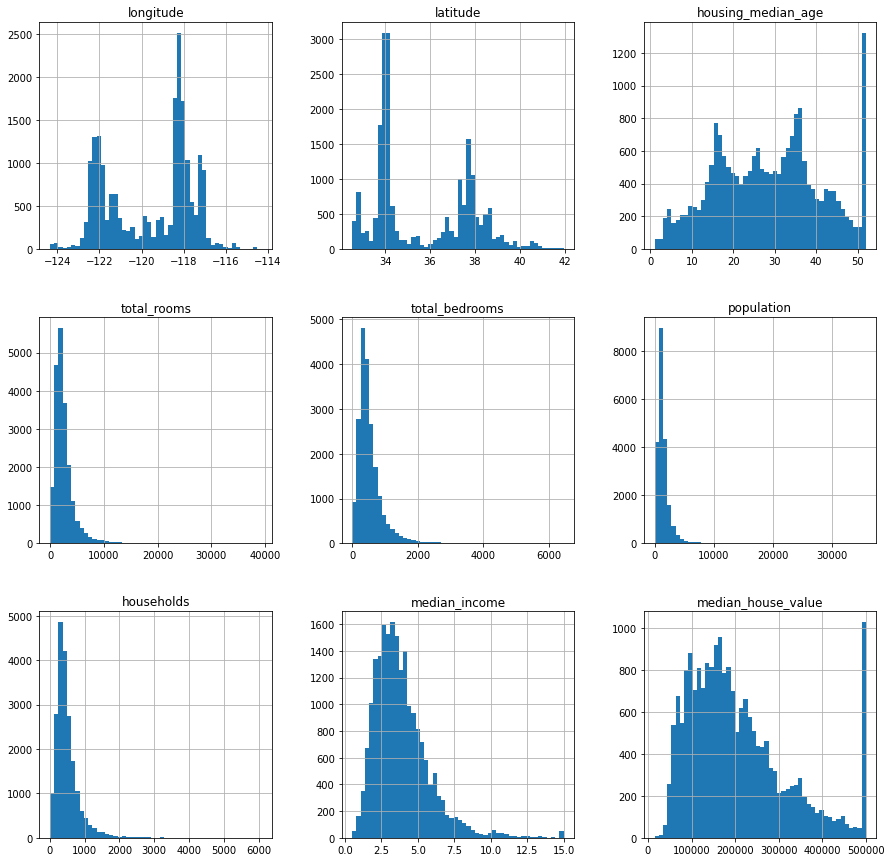

In [174]:
# Plot the data
housing.hist(bins=50, figsize=(15, 15))
plt.show()

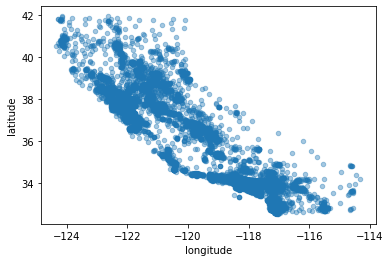

In [175]:
housing.plot(kind="scatter", x = "longitude", y="latitude", alpha=0.4) # alpha shows where there is a high density of points.

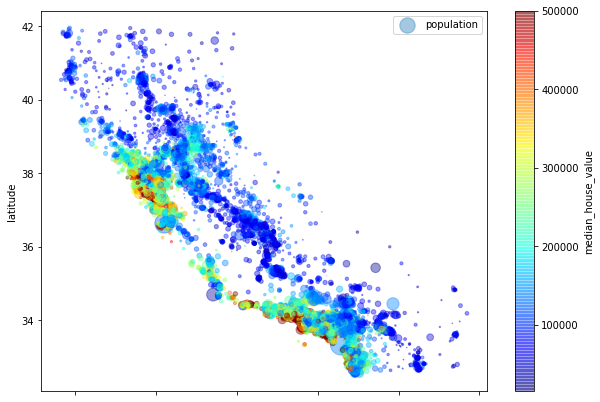

In [176]:
housing.plot(kind="scatter", x = "longitude", y="latitude", alpha=0.4,
             s=housing["population"]/75, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

# Split data for training and testing

- From here on out, median_house_value is already a label
- Housing still has ocean_proximity

In [177]:
from sklearn.model_selection import train_test_split

housing_labels = housing["median_house_value"].copy()
housing = housing.drop("median_house_value", axis=1)


X_train, X_test, y_train, y_test = train_test_split(housing, housing_labels, test_size=0.2, random_state=42)

housing_labels = y_train
housing = X_train

# Get rid of missing data

In [178]:
# Get imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") 


imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

# Handling text/category---ocean_proximity


In [179]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

housing_cat = housing[["ocean_proximity"]]
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
print(housing_cat_encoded[:10], "\n")
ordinal_encoder.categories_

[[0.]
 [1.]
 [3.]
 [3.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [4.]] 



[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## One-hot encode the bih

In [180]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot.toarray())

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


# Completely more convenient way of doing all of the above things-----ColumnTransformer

In [181]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

housing_num = housing.drop("ocean_proximity", axis=1)
numerical_attributes = list(housing_num)
categorical_attributes = ["ocean_proximity"]

numerical_pipeline = Pipeline([
                      ('imputer', SimpleImputer(strategy="median")),
                      ('std_scaler', StandardScaler())                               
])

full_pipeline = ColumnTransformer([
                      ("num", numerical_pipeline, numerical_attributes),
                      ("cat", OneHotEncoder(), categorical_attributes)            
])
housing_prepared = full_pipeline.fit_transform(housing)

pd.DataFrame(housing_prepared)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.858307,-0.852039,-0.207863,0.709823,0.547713,0.919175,0.723667,0.594568,1.0,0.0,0.0,0.0,0.0
1,-1.501042,1.380346,-0.846032,-0.253406,-0.073791,-0.449695,-0.033858,-0.990249,0.0,1.0,0.0,0.0,0.0
2,-1.461053,0.996582,1.866187,-0.179206,-0.266671,-0.301198,-0.237607,-0.145633,0.0,0.0,0.0,1.0,0.0
3,-1.306095,0.996582,0.669620,-0.486083,-0.426214,-0.443395,-0.470089,-0.832148,0.0,0.0,0.0,1.0,0.0
4,2.022986,-0.660157,0.111222,-0.960140,-0.954849,-1.173279,-1.141413,-1.338579,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.613375,-0.739718,0.988704,-0.246078,-0.154753,-0.051004,-0.091326,-0.594784,1.0,0.0,0.0,0.0,0.0
16508,-1.186129,0.800020,0.988704,-0.222260,-0.152372,-0.300298,-0.080877,-0.071021,1.0,0.0,0.0,0.0,0.0
16509,0.373441,-0.201512,0.430306,-0.206688,-0.161897,0.435885,-0.117447,-0.926258,0.0,1.0,0.0,0.0,0.0
16510,1.313182,-1.324724,-0.606719,2.413680,4.179103,3.098026,4.223957,-1.042456,1.0,0.0,0.0,0.0,0.0


# Select and Train a Model

In [182]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(housing_prepared, housing_labels)

some_data = housing.iloc[:5000]
some_labels = housing_labels.iloc[:5000]
some_data_prepared = full_pipeline.fit_transform(some_data)
print(pd.DataFrame(lin_model.predict(some_data_prepared)).head(), "\n")
print(pd.DataFrame(some_labels))


               0
0  252266.100029
1  120574.181071
2  254328.455147
3  175754.988006
4    6579.145093 

       median_house_value
11075            248100.0
9985             225000.0
16057            331200.0
298              107000.0
13920             42500.0
...                   ...
16464            120100.0
6539             160600.0
14706            228600.0
9097             156700.0
14624            166800.0

[5000 rows x 1 columns]


## Evaluate the model with RMSE

In [183]:
from sklearn.metrics import mean_squared_error
housing_pred = lin_model.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68425.13494361476

# Let's try a totally different model---Decision Tree

In [184]:
# Get the tree and fit it
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [185]:
housing_pred = tree_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0

## As you run the block above, you see that the rmse is 0 which is never possible so it is most definitely OVERFITTING

In [186]:
# Check that it is actually overfitting

# DT rmse score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
print(tree_rmse_scores.mean())

# Lin model rmse score
scores = cross_val_score(lin_model, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_model_scores = np.sqrt(-scores)
print(lin_model_scores.mean())

68291.08148884826
68459.86042237366


# Try a different model--RandomForest

In [187]:
#import and fit the model

from sklearn.ensemble import RandomForestRegressor
rand_forest = RandomForestRegressor()
rand_forest.fit(housing_prepared, housing_labels)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [188]:
# Predict with RF
housing_pred = rand_forest.predict(housing_prepared)
rand_forest_mse = mean_squared_error(housing_labels, housing_pred)
rand_forest_rmse = np.sqrt(rand_forest_mse)
rand_forest_rmse

# rmse is kinda low so it is overfitting---need to simplify with regularization or something.

18149.668085479898

# Fine tune your model with Grid Search
- Grid Search basically tries out every possible combination in hyperparameters
- Does the fiddling of hyperparameters all for you

In [189]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = [
              {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

rand_forest = RandomForestRegressor()
grid_search = RandomizedSearchCV(rand_forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [190]:
# Get the results
cvres = grid_search.cv_results_
for error, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-error), params)
print("\n")
## The best loss is when max_features is 8 and n_estimators=30^^^
# Also can get the same thing by doing:
best_rand_forest = grid_search.best_estimator_
best_rand_forest

51701.59331296747 {'n_estimators': 10, 'max_features': 3, 'bootstrap': False}
53688.834564170975 {'n_estimators': 10, 'max_features': 2, 'bootstrap': False}
50118.60759687817 {'n_estimators': 30, 'max_features': 4}
49597.830555334214 {'n_estimators': 30, 'max_features': 6}
60742.489151621274 {'n_estimators': 3, 'max_features': 4}
58494.900914600265 {'n_estimators': 3, 'max_features': 6}
51344.858559536515 {'n_estimators': 10, 'max_features': 8}
60062.88690932784 {'n_estimators': 3, 'max_features': 3, 'bootstrap': False}
58870.694628052646 {'n_estimators': 3, 'max_features': 8}
52270.901802037755 {'n_estimators': 10, 'max_features': 4}




RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## Analyze this data a bit

In [191]:
# See which feature had the most amount of weight
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_1hot_attributes = list(cat_encoder.categories_[0]) # Gets all the categories of the ocean_proximity
attributes = numerical_attributes + cat_1hot_attributes # Puts all the attributes together into one single array

# Get the feature importance
feature_importances = best_rand_forest.feature_importances_

# Sort the feature importances from greatest to least
sorted(zip(feature_importances, attributes), reverse=True)
# Median income was the most important

[(0.42101490025145394, 'median_income'),
 (0.13772461330746255, 'INLAND'),
 (0.11832310103018347, 'longitude'),
 (0.1138537246823949, 'latitude'),
 (0.04884913830218353, 'housing_median_age'),
 (0.04478452303681477, 'population'),
 (0.035350959443678415, 'total_rooms'),
 (0.031248619789489007, 'total_bedrooms'),
 (0.027590344566932355, 'households'),
 (0.012319603394328625, '<1H OCEAN'),
 (0.005922144194653668, 'NEAR OCEAN'),
 (0.002680884745300883, 'NEAR BAY'),
 (0.00033744325512377523, 'ISLAND')]

# Predict on test dataset.

In [192]:
X_test_prepared = full_pipeline.transform(X_test) # We don't want to fit the X_test to the pipeline so just transform

# Predict
final_pred = best_rand_forest.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
final_rmse


from scipy import stats
confidence = 0.95
squared_errors = (final_pred - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors))
)

array([53114.2700444 , 57564.28620352])